In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

In [4]:
data=pd.read_csv('Cleaned-Data.csv')

In [5]:
data.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [6]:
data.shape

(316800, 27)

In [7]:
data.isna().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [9]:
data.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [10]:
symptoms=['Fever','Tiredness','Dry-Cough','Difficulty-in-Breathing','Sore-Throat','None_Sympton','Pains','Nasal-Congestion','Runny-Nose','Diarrhea']

In [11]:
ages=['Age_0-9','Age_10-19','Age_20-24','Age_25-59','Age_60+']

In [12]:
gender=['Gender_Female','Gender_Male','Gender_Transgender']

In [13]:
severity=['Severity_None','Severity_Mild','Severity_Moderate','Severity_Severe']

In [14]:
data.drop(columns=['None_Experiencing'],inplace=True)

In [15]:
data=(pd.concat([data,pd.get_dummies(data['Country'],prefix='country')],axis=1,join='inner')).drop(columns=['Country'])

In [16]:
data.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,country_China,country_France,country_Germany,country_Iran,country_Italy,country_Other,country_Other-EUR,country_Republic of Korean,country_Spain,country_UAE
0,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [17]:
from mlxtend.frequent_patterns import fpgrowth

In [18]:
fpgrowth(data,min_support=0.1,use_colnames=True)

,support,itemsets
0,0.562500,(Dry-Cough)
1,0.545455,(Nasal-Congestion)
2,0.545455,(Runny-Nose)
3,0.500000,(Tiredness)
4,0.500000,(Difficulty-in-Breathing)
...,...,...
257,0.112500,"(Dry-Cough, Age_60+)"
258,0.109091,"(Runny-Nose, Age_60+)"
259,0.109091,"(Nasal-Congestion, Age_60+)"
260,0.100000,"(Difficulty-in-Breathing, Age_60+)"


In [19]:
data_corr_symptoms=data[symptoms]

In [42]:
def corr_with_symptoms(col_name):
    corr_matrix=pd.concat([data_corr_symptoms,data[col_name]],axis=1).corr()[col_name].sort_values(ascending=False).drop(index=[col_name])
    plt.style.use('fivethirtyeight')
    plt.barh(list(corr_matrix.index),list(corr_matrix.values))
    plt.xlabel("corr with "+col_name)
    plt.show()

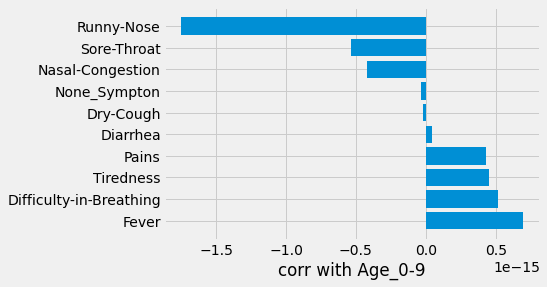

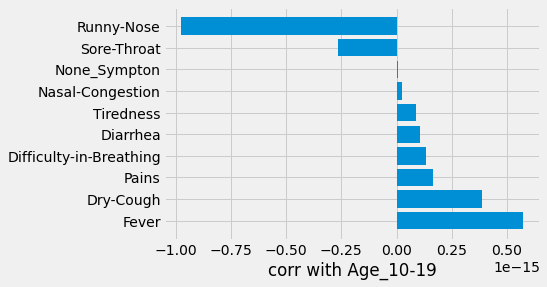

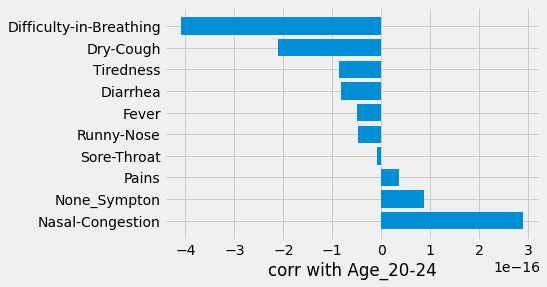

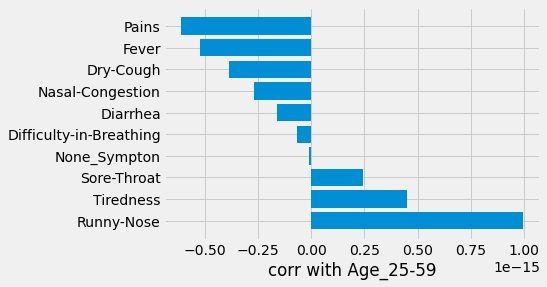

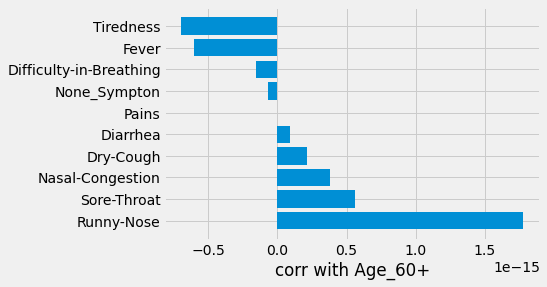

In [43]:
for age_group in ages:
    corr_with_symptoms(age_group)

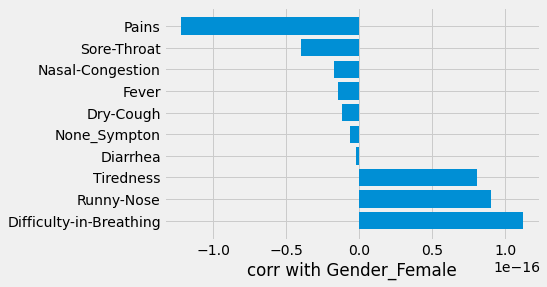

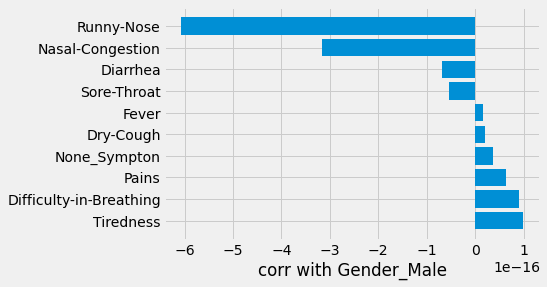

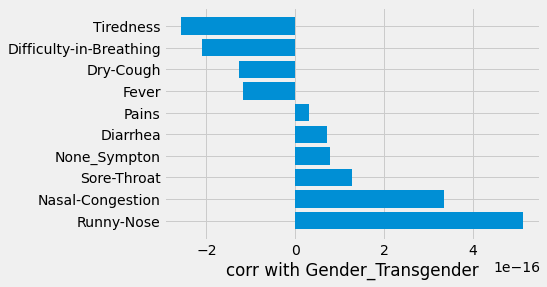

In [45]:
for gender_group in gender:
    corr_with_symptoms(gender_group)

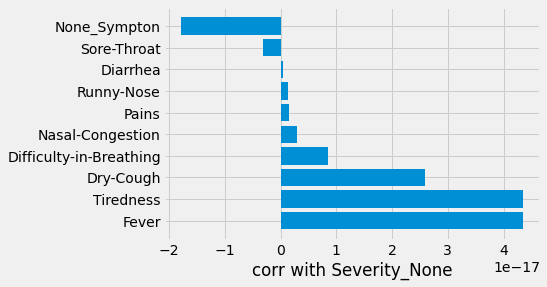

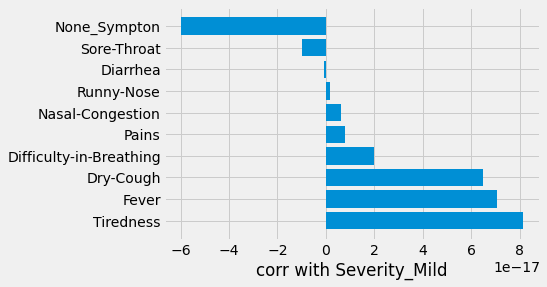

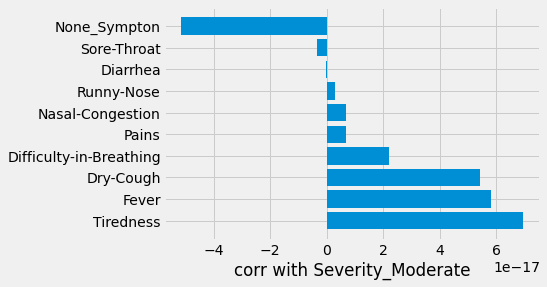

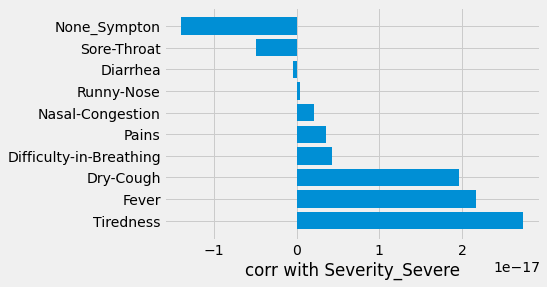

In [46]:
for severity_level in severity:
    corr_with_symptoms(severity_level)